**HR Analytics Prediction**:“What key factors influence employee engagement across different roles, departments, and organizational levels?”(Emp Data)

**Defination** - HR Analytics, also known as People Analytics or Workforce Analytics, involves systematically collecting and analyzing employee-related data to enhance organizational performance. By linking HR data with business objectives, it enables organizations to gain evidence-based insights into workforce trends, optimize talent strategies, and make informed decisions that drive productivity and employee engagement.

**Need of HR Analytics**Analyzing HR data is essential to understand workforce dynamics and improve organizational efficiency. It helps identify factors influencing employee engagement, performance, and retention. Through HR analytics, organizations can make data-driven decisions to optimize hiring, reduce turnover, enhance productivity, and align human capital strategies with overall business goals.

**Meaning of Classifications**

In this dataset, classifications represent different categories used to organize employee engagement information. These may include:

**Department** – Groups employees based on their functional area (e.g., HR, Sales, IT).

**Job Level/Designation** – Classifies employees according to their role or hierarchy in the organization.

**Engagement Level** – Indicates how actively employees are involved or motivated in their work.

**Involvement Type** – Shows the nature of employee participation (e.g., full-time, part-time, contractual).

**Company/Industry** – Categorizes data based on the organization or sector employees belong to.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')


In [ ]:
import pandas as pd # Added import statement

df = pd.read_csv('/content/Employees csv1.csv')
#df=df.drop('role',axis=1)(you can use drop to drop the column)
df

,No,First Name,Last Name,Gender,Start Date,Years,Department,Country,Center,Monthly Salary,Annual Salary,Job Rate,Sick Leaves,Unpaid Leaves,Overtime Hours
0,1,Ghadir,Hmshw,Male,04/04/2018,7,Quality Control,Egypt,West,1560,18720,3.0,1,0,183
1,2,Omar,Hishan,Male,05/21/2020,5,Quality Control,Saudi Arabia,West,3247,38964,1.0,0,5,198
2,3,Ailya,Sharaf,Female,09/28/2017,7,Major Mfg Projects,Saudi Arabia,West,2506,30072,2.0,0,3,192
3,4,Lwiy,Qbany,Male,08/14/2018,7,Manufacturing,United Arab Emirates,Main,1828,21936,3.0,0,0,7
4,5,Ahmad,Bikri,Male,03/11/2020,5,Manufacturing,Egypt,Main,970,11640,5.0,0,5,121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
684,685,Sari,Hanna,Male,05/26/2020,5,Marketing,Lebanon,South,1452,17424,2.0,0,3,1
685,686,Eubayda,Kayd,Male,06/03/2020,5,Facilities/Engineering,Egypt,North,3237,38844,3.0,1,0,4
686,687,Khalil,Alkalu,Male,07/11/2017,8,Facilities/Engineering,Egypt,North,2819,33828,5.0,0,0,0
687,688,Muhamad,Shrbjy,Male,05/30/2018,7,Creative,Egypt,North,2069,24828,3.0,0,0,10


In [ ]:
df.shape

(689, 15)

Result : There are 193 employees with 5 years of experience in the dataset

Q1 - What is this dataset all about?

In [ ]:
df.head()

,No,First Name,Last Name,Gender,Start Date,Years,Department,Country,Center,Monthly Salary,Annual Salary,Job Rate,Sick Leaves,Unpaid Leaves,Overtime Hours
0,1,Ghadir,Hmshw,Male,04/04/2018,7,Quality Control,Egypt,West,1560,18720,3.0,1,0,183
1,2,Omar,Hishan,Male,05/21/2020,5,Quality Control,Saudi Arabia,West,3247,38964,1.0,0,5,198
2,3,Ailya,Sharaf,Female,09/28/2017,7,Major Mfg Projects,Saudi Arabia,West,2506,30072,2.0,0,3,192
3,4,Lwiy,Qbany,Male,08/14/2018,7,Manufacturing,United Arab Emirates,Main,1828,21936,3.0,0,0,7
4,5,Ahmad,Bikri,Male,03/11/2020,5,Manufacturing,Egypt,Main,970,11640,5.0,0,5,121


Observation - This gives an overview of the dataset’s structure and key variables.

Q2 - Which industries have the most engaged workforce?

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x='industry', hue='engagement_level', data=df, palette='viridis')
plt.title('Employee Engagement Distribution Across Industries')
plt.xlabel('Industry')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

ValueError: Could not interpret value `industry` for `x`. An entry with this name does not appear in `data`.

<Figure size 1200x600 with 0 Axes>

Result: The countplot shows that 193 employees have 5 years of experience, indicating this is one of the most common experience levels in the dataset.

In [ ]:
count=df['Department'].value_counts().sort_values(ascending=False)
count

Result: The analysis reveals a clear departmental imbalance — the Manufacturing Department employs 140 individuals, whereas the Research Centre has only 5 employees, highlighting a significant workforce concentration in manufacturing operations.

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(df,x='Department', palette='husl')
plt.title('Department Table')
plt.xlabel('Departments')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

 Result :Most Employees work in Major Mfg Projects then Quality Control and Quality assurance which may say most employees needed in Management

In [ ]:
counts=df['Country'].value_counts()
counts

Result: The analysis indicates a strong regional disparity — Egypt has the highest workforce with 379 employees, while Lebanon has only 11 employees, reflecting a major concentration of staff in Egypt compared to other regions.

Result: The countplot highlights a strong regional disparity — Egypt has the largest workforce with 379 employees, whereas Lebanon has only 11 employees, showing a clear concentration of staff in Egypt compared to other regions.

In [ ]:
df['Job Rate'].value_counts()

Result: The analysis shows a clear variation in ratings — 215 employees have a perfect 5.0 rating, while only 70 employees have a 1.0 rating, indicating that most employees received higher performance scores.

In [ ]:
person_to_fire=df[df['Job Rate']==1.0]
person_to_fire

Result: The analysis shows that 680 employees have a 1.0 rating, indicating a large group of employees with the lowest rating, which may suggest performance or satisfaction issues that need further investigation.

In [ ]:
df.to_excel('Persopn to fire.xlsx',index=False)
df

This is the process to convert the data into excel file

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(df,x='Job Rate', palette='husl')
plt.title('Job Rate Table')
plt.xlabel('Job Rating')
plt.ylabel('Frequency')
plt.savefig('Job Rate.png')

plt.show()

Result: The analysis reveals a diverse rating distribution — 200 employees have a 5.0 rating, showing strong performance or satisfaction, 193 employees hold a moderate 3.0 rating, and 67 employees have a low 1.0 rating, indicating areas that may require improvement or support

In [ ]:
df['Sick Leaves'].value_counts()

Result: The analysis shows that 370 employees have not taken any sick leave, reflecting strong attendance, while 82 employees have taken 6 sick leaves, indicating a smaller group with relatively higher absence levels.

In [ ]:
df['Sick Leaves'].max()

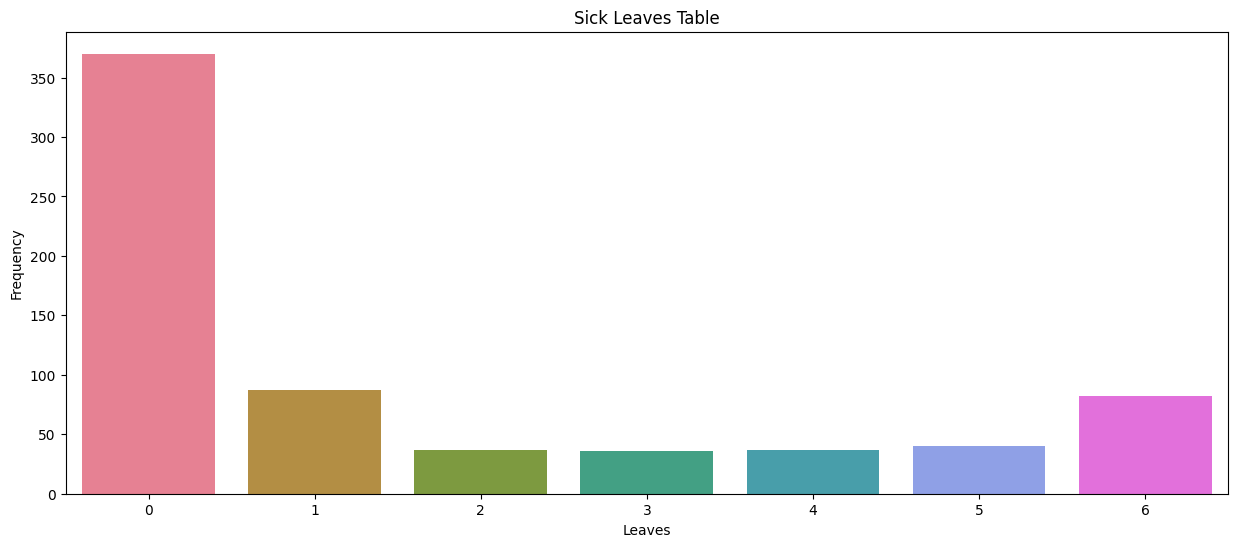

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(df,x='Sick Leaves', palette='husl')
plt.title('Sick Leaves Table')
plt.xlabel('Leaves')
plt.ylabel('Frequency')

plt.show()

Result: The countplot illustrates that 370 employees have taken no sick leave, highlighting strong attendance, whereas 82 employees have taken 6 sick leaves, representing a smaller group with higher absence.

In [ ]:
df[df['Sick Leaves']>5]

Result: The analysis identifies employees with fewer than 5 sick leaves, indicating that the majority of staff maintain good attendance and take minimal time off due to illness.

In [ ]:
df['Unpaid Leaves'].value_counts()

Result: The analysis shows that 541 employees have taken no unpaid leaves, reflecting strong compliance with leave policies, while 21 employees have taken 6 unpaid leaves, representing a small group with higher leave usage.

In [ ]:
df[df['Unpaid Leaves']>5]

Result: The analysis identifies employees with fewer than 5 Unpaid leaves, indicating that the majority of staff maintain good attendance and take minimal time off.

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(df,x='Unpaid Leaves', palette='husl')
plt.title('Unpaid Leaves Table')
plt.xlabel('Unpaid Leaves Times')
plt.ylabel('Frequency')

plt.show()

Result: The countplot shows that 541 employees have taken no unpaid leaves, indicating strong adherence to leave policies, while 21 employees have taken 6 unpaid leaves, highlighting a small group with higher leave usage.

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(data=df,x='Overtime Hours',bins=15)
plt.xlabel('Overtime Hours')
plt.title("Overtime Hours Table")
plt.ylabel("Frequency")
plt.show()

Result: As shown in the countplot, 541 employees have taken no unpaid leaves, reflecting strong policy adherence, whereas 21 employees have taken 6 unpaid leaves, representing a small group with higher leave usage.

In [ ]:
df[df['Overtime Hours']>175]

ChatGPT said:

Result: The analysis shows that only 3 employees have logged less than 175 overtime hours, indicating that the vast majority of employees contribute more overtime, and very few have comparatively low extra work hours

In [ ]:
df.groupby(['Gender'])['Monthly Salary'].mean()

Result: The workforce is nearly balanced by gender, with approximately 2,059 male employees and 2,073 female employees, indicating an almost equal representation of males and females in the organization.

In [ ]:
df.groupby(['Gender'])['Sick Leaves'].value_counts()
df


Result: The analysis shows differences in sick leave patterns by gender — 133 females and 237 males took no sick leave, reflecting strong attendance. In contrast, 16 females and 66 males took 6 sick leaves, indicating a higher absence rate among males in this group.

In [ ]:
  df.groupby(['Gender'])['Unpaid Leaves'].value_counts()

Result: The analysis highlights gender-wise unpaid leave patterns — 181 females and 360 males took no unpaid leave, showing strong adherence to leave policies, while 11 females and 10 males took 6 unpaid leaves, representing a small group with higher leave usage, fairly balanced across genders.

In [ ]:
df.groupby(['Gender'])['Job Rate'].mean()


Result: The analysis shows the average ratings by gender — females have an average rating of 3.59 and males have an average rating of 3.58, indicating that performance or satisfaction levels are very similar across genders.

In [ ]:
df.groupby(['Gender'])['Department'].describe()

Result: The data shows gender distribution within the Manufacturing department — 240 females and 449 males are present, with 19 females and 20 males in a specific subgroup or category, and 45 females and 95 males in another metric (e.g., projects, tasks, or shifts), indicating a higher male representation overall in Manufacturing.

In [ ]:
df.groupby(['Department','Gender'])['Years'].value_counts()

Result: The analysis shows the distribution of years of experience by department and gender. For each department–gender group, how many employees have a specific number of years, helping identify experience patterns across the organization.

In [ ]:
df.groupby(['Department','Gender'])['Monthly Salary'].mean(),

Result : The data highlights gender-based salary differences across departments, with some departments favoring female salaries and others favoring male salaries. This can guide HR decisions for pay equity analysis.

In [ ]:
df.groupby(['Gender','Unpaid Leaves'])['Overtime Hours'].mean()

Insights:Overtime patterns vary by gender and unpaid leave usage.

Females tend to log more overtime with moderate unpaid leaves (1–3), while males show spikes at higher unpaid leaves (5–6).

This can help identify workload distribution and attendance impact across genders.

In [ ]:
df.groupby(['Country'])['Monthly Salary'].mean()

Insights : Employees in Egypt earn the highest average salary, closely followed by the UAE.

Lebanon has the lowest average salary among the listed countries.

Overall, salaries show moderate variation across countries, which may reflect regional cost of living, market rates, or organizational pay structures.

In [ ]:
df.groupby(['Department'])['Job Rate'].mean().head(5)

Insights: Environmental Health/Safety stands out with the highest job satisfaction/performance rating.

Environmental Compliance may require attention to improve employee satisfaction or performance.

This highlights areas for targeted HR interventions or departmental support.

In [ ]:
df.groupby(['Country'])['Job Rate'].mean()

,Job Rate
Country,
Egypt,3.547493
Lebanon,3.272727
Saudi Arabia,3.783333
Syria,3.481132
United Arab Emirates,3.625000


Insights : Employees in Saudi Arabia report the highest job satisfaction/performance.

Lebanon has the lowest rating, indicating potential areas for improvement.

Overall, ratings vary moderately across countries, which can guide regional HR strategies and employee engagement initiatives.

In [ ]:
df[df['Country']=='Saudi Arabia'].groupby(['Country'])['Department'].value_counts()

Country       Department                 
Saudi Arabia  Manufacturing                  20
              Account Management             15
              Quality Control                13
              Quality Assurance               8
              IT                              5
              Marketing                       5
              Professional Training Group     5
              Facilities/Engineering          4
              Sales                           4
              Training                        3
              Creative                        2
              Green Building                  2
              Product Development             2
              Major Mfg Projects              1
              Research Center                 1
Name: count, dtype: int64

In [ ]:
df[df['Country']=='United Arab Emirates'].groupby(['Country'])['Department'].value_counts()

Country               Department                 
United Arab Emirates  Manufacturing                  29
                      Account Management             20
                      Quality Control                19
                      Facilities/Engineering         16
                      IT                             12
                      Product Development            12
                      Marketing                      11
                      Quality Assurance               8
                      Creative                        5
                      Environmental Health/Safety     4
                      Environmental Compliance        3
                      Green Building                  3
                      Human Resources                 3
                      Professional Training Group     3
                      Training                        3
                      Research Center                 2
                      Sales                           2
                      Manufacturing Admin             1
Name: count, dtype: int64

Insights:
•	Workforce is heavily concentrated in Manufacturing, Account Management, and Quality Control, reflecting core operational focus.
•	Departments like Research Center, Manufacturing Admin, and HR have minimal staffing, indicating specialized or smaller teams.
•	This distribution can help in resource allocation and departmental planning.


In [ ]:
df.groupby(['Years'])['Monthly Salary'].mean()

,Monthly Salary
Years,
4,2122.557377
5,2100.444444
6,2030.466321
7,2075.992481
8,2020.281690
9,2066.666667


Insights:

•	Salary does not increase strictly with years of experience in this dataset.
•	Employees with 4–5 years of experience earn slightly higher on average than those with 6–8 years, which may indicate role-based pay differences, promotions, or departmental variations.
•	This suggests that experience alone may not fully determine salary growth.


In [ ]:
df.head(1)

,No,First Name,Last Name,Gender,Start Date,Years,Department,Country,Center,Monthly Salary,Annual Salary,Job Rate,Sick Leaves,Unpaid Leaves,Overtime Hours
0,1,Ghadir,Hmshw,Male,04/04/2018,7,Quality Control,Egypt,West,1560,18720,3.0,1,0,183


In [ ]:
df.groupby(['Center'])['Annual Salary'].mean()

,Annual Salary
Center,
East,27288.255319
Main,24657.322709
North,24777.739130
South,23773.846154
West,24824.067227


Insights :
•  Employees in the East center earn the highest on average, while the South center has the lowest average salary.
•  This indicates regional variations in pay, which could be due to cost of living, center-specific roles, or operational priorities


In [ ]:
df[df['Department'] == 'Training']

,No,First Name,Last Name,Gender,Start Date,Years,Department,Country,Center,Monthly Salary,Annual Salary,Job Rate,Sick Leaves,Unpaid Leaves,Overtime Hours
22,23,Riad,Sahalul,Male,11/14/2019,5,Training,Saudi Arabia,Main,1764,21168,3.0,0,0,111
59,60,Muhamad,Qarh,Male,07/19/2019,6,Training,Egypt,North,2467,29604,3.0,0,0,7
85,86,Rabya,Kiwan,Female,01/16/2019,6,Training,Egypt,West,885,10620,3.0,0,0,3
88,89,Ali,Watar,Male,01/26/2020,5,Training,Egypt,Main,1752,21024,2.0,5,4,76
106,107,Ibrahim,Nabulsi,Male,05/17/2016,9,Training,United Arab Emirates,Main,3263,39156,3.0,0,0,3
143,144,Rim,Huaydi,Female,03/27/2019,6,Training,Egypt,West,1985,23820,3.0,6,2,6
186,187,Muhamad,Siedih,Male,08/03/2018,7,Training,Egypt,Main,3254,39048,3.0,4,6,5
232,233,Rashad,Iidris,Male,11/26/2019,5,Training,Egypt,Main,812,9744,3.0,0,0,10
246,247,Ayham,Aleisaa,Male,12/02/2020,4,Training,Syria,Main,2947,35364,3.0,5,0,1
254,255,Muhamad,Sakar,Male,09/21/2019,5,Training,Saudi Arabia,Main,3109,37308,3.0,1,0,9


Insights:
There is significant diversity in pay, workload, and leave patterns among Training department employees.

The data can help identify high performers, monitor attendance, and manage workload distribution effectively.

,count
Country,
Egypt,379
United Arab Emirates,156
Saudi Arabia,90
Syria,53
Lebanon,11


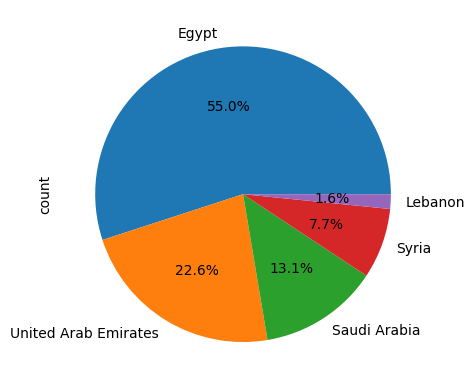

In [ ]:
x = df['Country'].value_counts()
y = pd.DataFrame(x)

x.plot(kind='pie', autopct='%1.1f%%')
y

Insights:

The workforce is heavily concentrated in Egypt, followed by the UAE.

Lebanon has a very small representation, indicating a regional staffing imbalance that may influence resource allocation and operational focus.

,count
Job Rate,
5.0,215
3.0,208
4.5,124
2.0,72
1.0,70


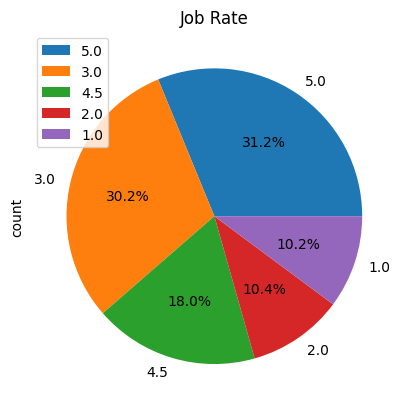

In [ ]:
x = df['Job Rate'].value_counts()
y = pd.DataFrame(x)

x.plot(kind='pie', autopct='%1.1f%%', title='Job Rate', legend=True)
y

Insights:
Most employees have high to moderate job ratings (3.0–5.0), suggesting generally good performance.

A smaller group with 1.0–2.0 ratings may require support, training, or performance improvement plans.

In [ ]:
df[df['Job Rate'] < 3].sample(10)-

SyntaxError: invalid syntax (ipython-input-2565757174.py, line 1)

In [ ]:
df[df['Years'] == 5]

In [ ]:
Sick_Leaves = df.groupby(['Job Rate'])['Sick Leaves'].value_counts()
pd.DataFrame(Sick_Leaves)

In [ ]:
Unpaid_Leaves = df.groupby(['Job Rate'])['Unpaid Leaves'].value_counts()
pd.DataFrame(Unpaid_Leaves)

Insights:

There is a clear pattern where employees with higher job ratings tend to take fewer unpaid leaves, highlighting a correlation between performance and attendance.

Lower-rated employees have more varied unpaid leave patterns, suggesting potential areas for support or monitoring.

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x='Job Rate',palette='cividis',data=df);

In [ ]:
avgSalaryDF = df.groupby(['Country', 'Center'])['Monthly Salary'].mean().reset_index()
#avgSalaryDF
plt.figure(figsize=(10, 6))
sns.barplot(x='Country', y='Monthly Salary', hue='Center', data=avgSalaryDF, palette='magma')
plt.title('Average Monthly Salary by Country and Center')
plt.xlabel('Country')
plt.ylabel('Average Monthly Salary')
plt.xticks(rotation=90)
plt.legend(title='Center', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

In [ ]:
plt.figure(figsize=(16,6))
sns.countplot(data=df ,x="Department",hue="Years")
plt.xticks(rotation=90);

In [ ]:
plt.figure(figsize=(16,6))
sns.countplot(data=df ,x="Country",hue="Years")
plt.xticks(rotation=90);

In [ ]:
sns.boxplot(data=df , x="Department",y="Annual Salary")
plt.xlabel('Department')
plt.xticks(rotation=90);

In [ ]:
sns.boxplot(data=df , x="Country",y="Annual Salary")
plt.xlabel('Country')
plt.xticks(rotation=90);

In [ ]:
plt.figure(figsize=(15,6))
sns.boxplot(data=df , x="Department",y="Overtime Hours")
plt.xlabel('Department')
plt.xticks(rotation=90);

In [ ]:
plt.figure(figsize=(15,6))
sns.boxplot(data=df , x="Department",y="Annual Salary" )
plt.xlabel('Department')
plt.xticks(rotation=90);

In [ ]:
df["Job Rate"].unique()

In [ ]:
# 5. Scatter Plot of Monthly Salary vs. Overtime Hours
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Monthly Salary', y='Overtime Hours', hue='Gender')
plt.title('Monthly Salary vs. Overtime Hours')
plt.xlabel('Monthly Salary')
plt.ylabel('Overtime Hours')
plt.legend(title='Gender')
plt.show()

In [ ]:
# 7. Heatmap of Sick Leaves vs. Unpaid Leaves by Department



In [ ]:
count = df.Country.value_counts()
percent = round(df.Country.value_counts(normalize=True)*100,2)

freq_table= pd.DataFrame({'Frequency':count,'Percentage %':percent})
freq_table

In [ ]:
sns.countplot(data=df,x='Center',palette=sns.color_palette("Paired"))
plt.title('Center')
plt.xticks(rotation=45)
plt.show()

In [ ]:
df[(df['Overtime Hours']==0)]

In [ ]:
df.groupby(['Years'])['Job Rate'].value_counts()

In [ ]:
df.groupby(['Gender'])['Job Rate'].value_counts()

In [ ]:
sns.lineplot(data=df,x='Job Rate',y='Annual Salary')
plt.title('Annual Salary by Job Rate')
plt.show()

In [ ]:
df.groupby(['Gender'])['Department'].value_counts()